In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2.2 Action selection in multiagent MDPs
In the last section we did a review of MDPs. Unsuprisingly, there are a lot of ways to improve on the basic idea. 

One option is exploit the independence between states, using what are called 'factored' state spaces. With a factored model we can simplify the process of calculating the transition probabilities. E.g., if you have two factors $X$ and $Y$ where the transition between states in $X$ and states in $Y$ is indepenent given the action. We can also simply the value function, by instead approximating $V$ by some function of the factors. For example, a weighted sum (if the states were numeric). The weights can be found with a method called temporal difference learning.

Another option, which we will cover here, is to exploit the independence between different actions. We assume agents are responsible for different choices, and hence the action $a$ can be split into a set of sub-actions ($a_1$,$a_2$,...). Unfortunately, actions is exponential in the number of individual agents. We want a faster option.

Say we know $Q$ already. Then we can recover the best action in state $s$ easily, as $\text{arg}\max_a Q(s,a)$. 

If we then assume that $Q$ breaks down into some $Q_i$ for each agent $i$, then this becomes
$\text{arg}\max_a \sum Q_i(s,a)$.

Finally, if we also assume that $Q_i$ only depends on *some* of the actions, then we might be able to use the variable elimination algorithm.

E.g.,

$$\max_{a_1} \max_{a_2} \max_{a_3} Q_1(s,a_1,a_2) + Q_2(s,a_2,a_3) + Q_3(s,a_3)$$

Can become:

$$\max_{a_1} \max_{a_2} Q_1(s,a_1,a_2) + \max_{a_3} \big[ Q_2(s,a_2,a_3) + Q_3(s,a_3) \big]$$

An an example let's consider the following problem. We have multiple agents. Each agent has some position. Each agent has their own utility function, BUT each agent will get a bonus if it is the same as the one after it. For simplicity say each agent gets to choose it's position. This basically means our $Q_i$ only depends on the actions of agents $i$ and $i+1$. We can then go forward through every agent and calculate the max. These can be viewed as messages, each containing the new estimate of the values of the receiving agent.

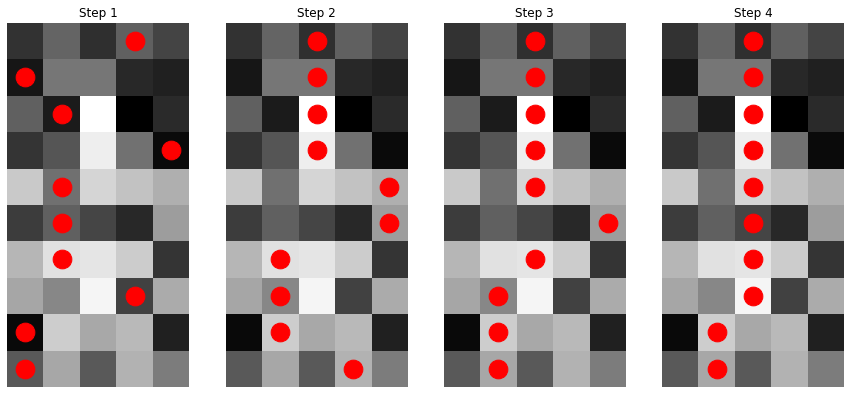

In [2]:
number_of_agents = 10
number_of_positions = 5
alignment_bonus = 0.3
utilities = np.random.rand(number_of_agents,number_of_positions)
message = utilities[0] # a message gives your new values, so start just with the utilities of the first agent
decisions = [] # what do you do give the agent in front
for current_agent in range(number_of_agents)[:-1]:
    new_message = np.zeros(number_of_positions)
    my_choices = np.zeros(number_of_positions).astype(int)
    for option in range(number_of_positions): # for each option the next agent has available
        u = message.copy()
        u[option] += alignment_bonus # add a bonus if the next agent is the same as you
        new_message[option] = np.max(u) + utilities[current_agent+1,option]
        my_choices[option] = np.argmax(u)
    message = new_message
    decisions.append(my_choices)

# finally add the last agents choice, which isn't conditional
decisions.append(np.argmax(message))

positions = np.random.choice(number_of_positions,number_of_agents)
position_history = [positions.copy()]

# do a simulation, running until no more agents are moving.
any_change = True
while any_change:
    any_change = False
    for agent in np.random.choice(number_of_agents,number_of_agents,replace=False):
        if(agent==number_of_agents-1):
            new_position = decisions[agent]
        else:
            new_position = decisions[agent][positions[agent+1]]
            
        if(not positions[agent]==new_position):
            positions[agent] = new_position
            any_change = True
            
    if any_change:
        position_history.append(positions.copy())

fig, axs = plt.subplots(1, len(position_history), figsize=(15, 15))
for i in range(len(position_history)):
    axs[i].imshow(utilities,origin="lower",cmap="gray")
    axs[i].scatter(position_history[i],np.arange(number_of_agents),s=350,color="red")
    axs[i].axis("off")
    axs[i].set_title(f'Step {i + 1}')
plt.show()